# Generating choice sets


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make a table representing full factorial experiment design.

With columns:

```
v (vendor type code)
vendor type
gc (ground vehicle delivery fee code)
ground vehicle fee
gt (ground vehicle delivery wait time code)
ground vehicle delivery wait time
dc (drone delivery fee code)
drone fee
dt (drone delivery wait time code)
drone delivery wait time
dp (drone privacy code)
drone privacy 

```

In [70]:
from attributes import (
    VENDOR_TYPES, COST_LEVELS, TIME_LEVELS, DRONE_PRIVACY_LEVELS,
)

# start with vendor type: 0: take-out food

v = 0
vendor_type = VENDOR_TYPES[v]
fees = COST_LEVELS[v]
wait_times = TIME_LEVELS[v]
drone_privacy = DRONE_PRIVACY_LEVELS

print('using')
print('vendor: %s: %s' % (v, vendor_type))
print('delivery fees: %s' % fees)
print('delivery wait times: %s' % wait_times)

using
vendor: 0: take-out food
delivery fees: [1, 3, 5, 8]
delivery wait times: [15, 20, 30, 45]


In [71]:
def get_data_records_for_vendor(v):
    vendor_type = VENDOR_TYPES[0]
    fees = COST_LEVELS[v]
    wait_times = TIME_LEVELS[v]
    drone_privacy = DRONE_PRIVACY_LEVELS
    print('get data records using')
    print('vendor: %s: %s' % (v, vendor_type))
    print('delivery fees: %s' % fees)
    print('delivery wait times: %s' % wait_times)
    data_records = []
    for ground_vehicle_fee_code, ground_vehicle_fee in enumerate(fees):
        for ground_vehicle_wait_time_code, ground_vehicle_wait_time in enumerate(wait_times):
            for drone_fee_code, drone_fee in enumerate(fees):
                for drone_wait_time_code, drone_wait_time in enumerate(wait_times):
                    for privacy_code, privacy in enumerate(drone_privacy):
                        data_record = {
                            'v': v,
                            'vendor type': vendor_type,
                            # ground vehicle cost
                            'gc': ground_vehicle_fee_code,
                            'ground vehicle fee': ground_vehicle_fee,
                            # ground vehicle time
                            'gt': ground_vehicle_wait_time_code,
                            'ground vehicle wait time': ground_vehicle_wait_time,
                            # drone cost
                            'dc': drone_fee_code,
                            'drone fee': drone_fee,
                            # drone time
                            'dt': drone_wait_time_code,
                            'drone wait time': drone_wait_time,
                            # drone privacy: 0/1
                            'dp': privacy_code,
                            'drone privacy': privacy
                        }
                        data_records += [data_record]
    return data_records

In [72]:
df = pd.DataFrame.from_records(get_data_records_for_vendor(v))
print('%s total rows' % len(df))
df

get data records using
vendor: 0: take-out food
delivery fees: [1, 3, 5, 8]
delivery wait times: [15, 20, 30, 45]
512 total rows


,v,vendor type,gc,ground vehicle fee,gt,ground vehicle wait time,dc,drone fee,dt,drone wait time,dp,drone privacy
0,0,take-out food,0,1,0,15,0,1,0,15,0,NO privacy
1,0,take-out food,0,1,0,15,0,1,0,15,1,YES privacy
2,0,take-out food,0,1,0,15,0,1,1,20,0,NO privacy
3,0,take-out food,0,1,0,15,0,1,1,20,1,YES privacy
4,0,take-out food,0,1,0,15,0,1,2,30,0,NO privacy
...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,take-out food,3,8,3,45,3,8,1,20,1,YES privacy
508,0,take-out food,3,8,3,45,3,8,2,30,0,NO privacy
509,0,take-out food,3,8,3,45,3,8,2,30,1,YES privacy
510,0,take-out food,3,8,3,45,3,8,3,45,0,NO privacy


Add in columns representing difference between choices w.r.t. 
- time (delivery wait time): drone wait time - ground vehicle wait time: dt - gt
- cost (delivery fee): drone fee - ground vehicle fee


In [73]:
df['dt - gt'] = df['drone wait time'] - df['ground vehicle wait time']
df['dc - gc'] = df['drone fee'] - df['ground vehicle fee']

In [74]:
df['exclude'] = False

In [75]:
def plot_points_tradeoff(df):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
    for i, privacy in enumerate(drone_privacy):
        ax = axes[i]
        df_p = df[df['drone privacy']==privacy]
        ax.scatter(
            df_p['dt - gt'], df_p['dc - gc'],
            color='gray', marker='.'
        )
        if ('exclude' in df_p.columns):
            df_p_no_exclude = df_p[df_p['exclude'] == False]
            ax.scatter(
                df_p_no_exclude['dt - gt'], df_p_no_exclude['dc - gc'],
                color='gray', marker='o',
            )
        if ('sampled' in df_p.columns):
            df_p_sampled = df_p[df_p['sampled'] == True]
            ax.scatter(
                df_p_sampled['dt - gt'], df_p_sampled['dc - gc'],
                color='black', marker='o',
            )
            
        ax.set_xlabel('drone wait time - ground vehicle wait time (mins)')
        ax.set_ylabel('drone cost - ground vehicle cost (\$)')
        ax.axvline(c='grey', lw=1)
        _ = ax.axhline(c='grey', lw=1)
        _ = ax.set_title(privacy)
    _ = fig.suptitle('Ground vehicle vs Drone choice differences w.r.t. cost and time')


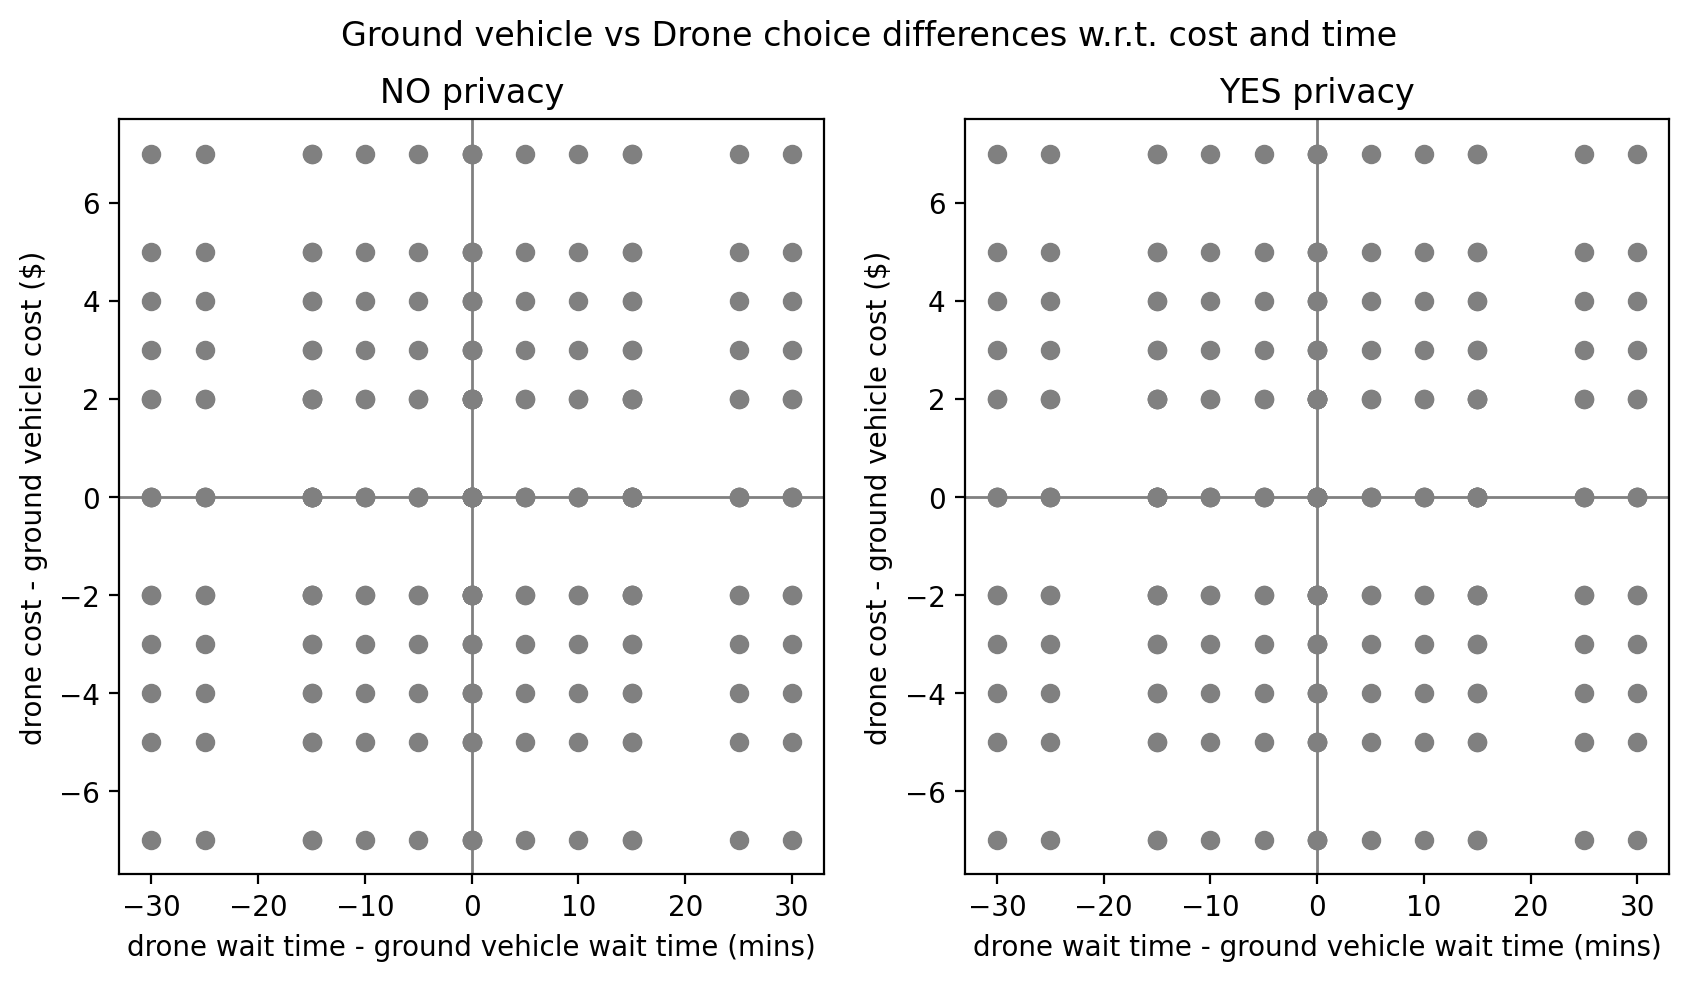

In [76]:
plot_points_tradeoff(df)

### Exclude choices

Exclude a choice if one option is "dominant" (with some wiggle room):

In [77]:
df['exclude'] = (
    ((df['dt'] - df['gt'] > 1) & (df['dc'] - df['gc'] > 1)) | \
    ((df['dt'] - df['gt'] < -1) & (df['dc'] - df['gc'] < -1))
)
df.loc[29:32]
# df.head()

,v,vendor type,gc,ground vehicle fee,gt,ground vehicle wait time,dc,drone fee,dt,drone wait time,dp,drone privacy,dt - gt,dc - gc,exclude
29,0,take-out food,0,1,0,15,3,8,2,30,1,YES privacy,15,7,True
30,0,take-out food,0,1,0,15,3,8,3,45,0,NO privacy,30,7,True
31,0,take-out food,0,1,0,15,3,8,3,45,1,YES privacy,30,7,True
32,0,take-out food,0,1,1,20,0,1,0,15,0,NO privacy,-5,0,False


delivery fees ($): [1, 3, 5, 8]
delivery wait times (mins): [15, 20, 30, 45]


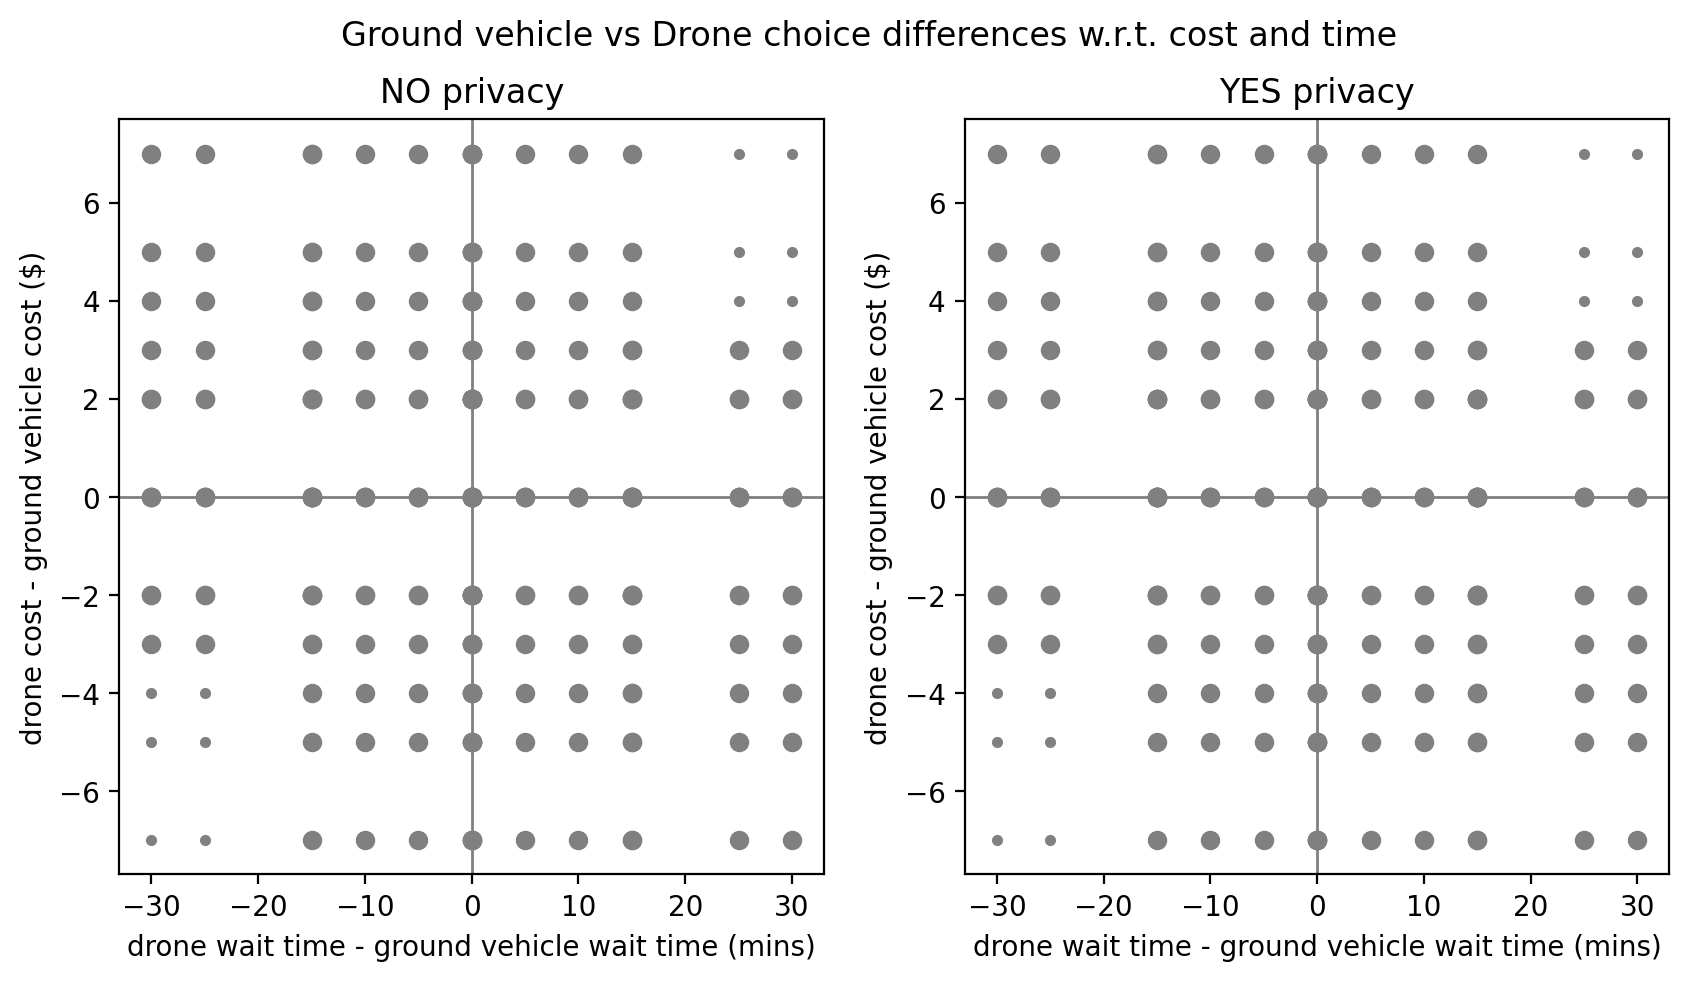

476 non-excluded choices


In [78]:
print('delivery fees ($):', fees)
print('delivery wait times (mins):', wait_times)
plot_points_tradeoff(df)
plt.show()
print('%s non-excluded choices' % len(df[df['exclude']==False]))

Also, drone deliveries are marketed as fast! Remove choices where

no drone privacy
and
drone time > ground vehicle time
and
drone cost > ground vehicle cost

In [79]:
df['exclude'] = ((df['exclude']==True) | ((df['dp']==0) & (df['dt'] > df['gt']) & (df['dc'] > df['gc'])))

delivery fees ($): [1, 3, 5, 8]
delivery wait times (mins): [15, 20, 30, 45]


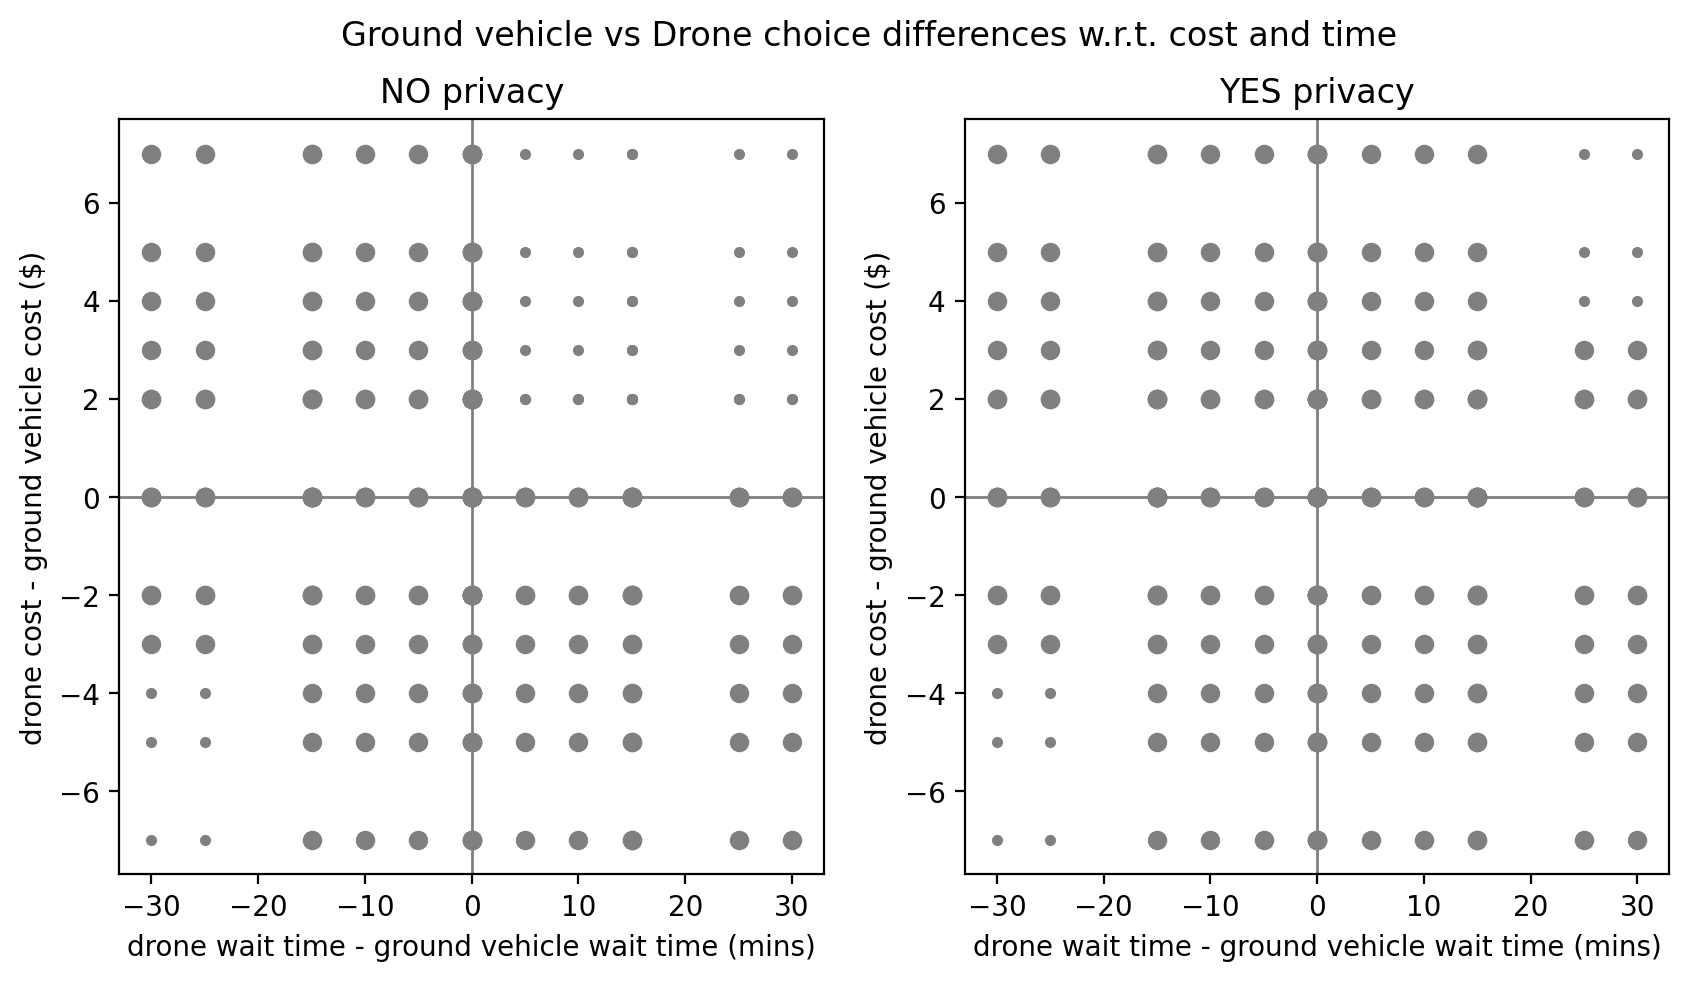

449 non-excluded choices


In [80]:
print('delivery fees ($):', fees)
print('delivery wait times (mins):', wait_times)
plot_points_tradeoff(df)
plt.show()
print('%s non-excluded choices' % len(df[df['exclude']==False]))

Simply exclude any choices where one alternative dominates the other w.r.t. both cost and time.

368 non-excluded choices


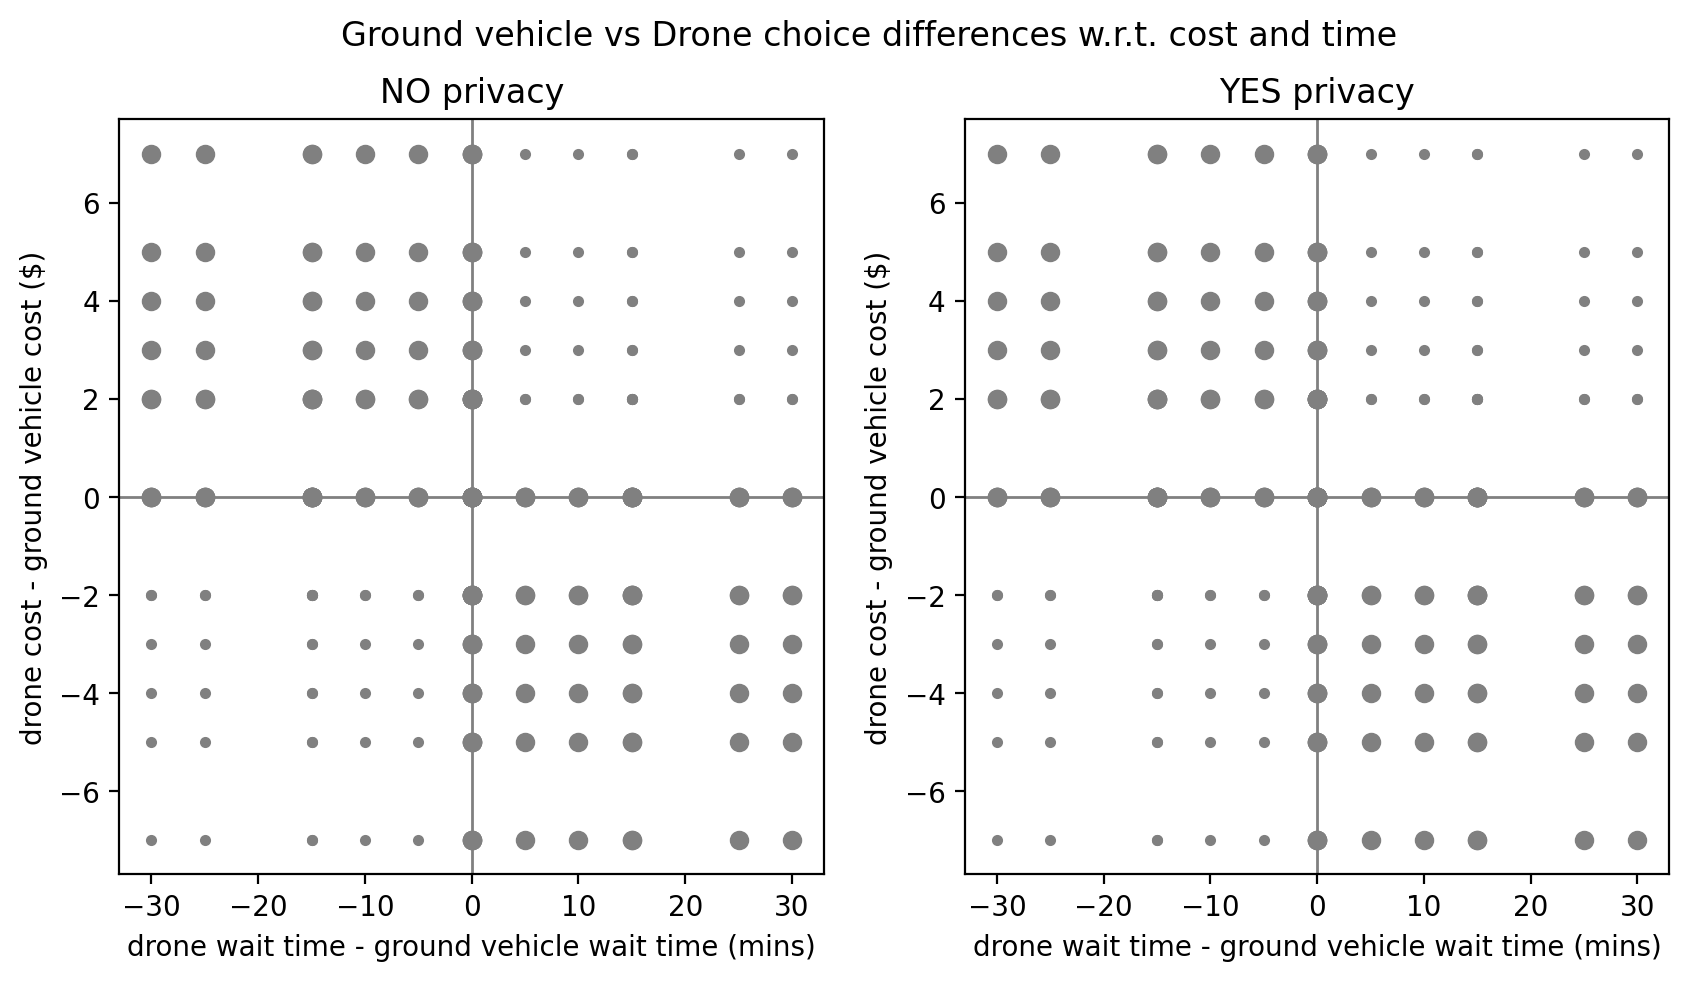

In [81]:
df['exclude'] = (
    ((df['dt'] - df['gt'] > 0) & (df['dc'] - df['gc'] > 0)) | \
    ((df['dt'] - df['gt'] < 0) & (df['dc'] - df['gc'] < 0))
)
plot_points_tradeoff(df)
print('%s non-excluded choices' % len(df[df['exclude']==False]))

Randomly sample a subset of non-excluded choices for which to generate questions.

In [82]:
QUESTIONS_SAMPLE_SIZE = 100

In [83]:
sampled_idx = np.random.choice(
    df[df['exclude']==False].index,
    QUESTIONS_SAMPLE_SIZE, 
    replace=False
)
print('sampled index: %s' % sampled_idx)
df['sampled'] = df.index.isin(sampled_idx)
df.head()

sampled index: [ 43 290 398 358 240 140 390  57 314 337 200 242 429 413 335 442  49 418
 400 477 168 293 308  93  67 250 179  41 405 196 427 258 421 444 384 439
 206 349   5 174 441 164  97 260 415 128 152 119 291   0 145  99 103 107
 203 391 257 253 268   8 408 476  59 342 241 338 187 313 392 273 126 395
 401 370 246 209 374 399 266 446 376 292 506 261 486  48 264 505 347 509
  56 472  92 218   1  36 334 315  39 162]


,v,vendor type,gc,ground vehicle fee,gt,ground vehicle wait time,dc,drone fee,dt,drone wait time,dp,drone privacy,dt - gt,dc - gc,exclude,sampled
0,0,take-out food,0,1,0,15,0,1,0,15,0,NO privacy,0,0,False,True
1,0,take-out food,0,1,0,15,0,1,0,15,1,YES privacy,0,0,False,True
2,0,take-out food,0,1,0,15,0,1,1,20,0,NO privacy,5,0,False,False
3,0,take-out food,0,1,0,15,0,1,1,20,1,YES privacy,5,0,False,False
4,0,take-out food,0,1,0,15,0,1,2,30,0,NO privacy,15,0,False,False


368 non-excluded choices
100 sampled choices


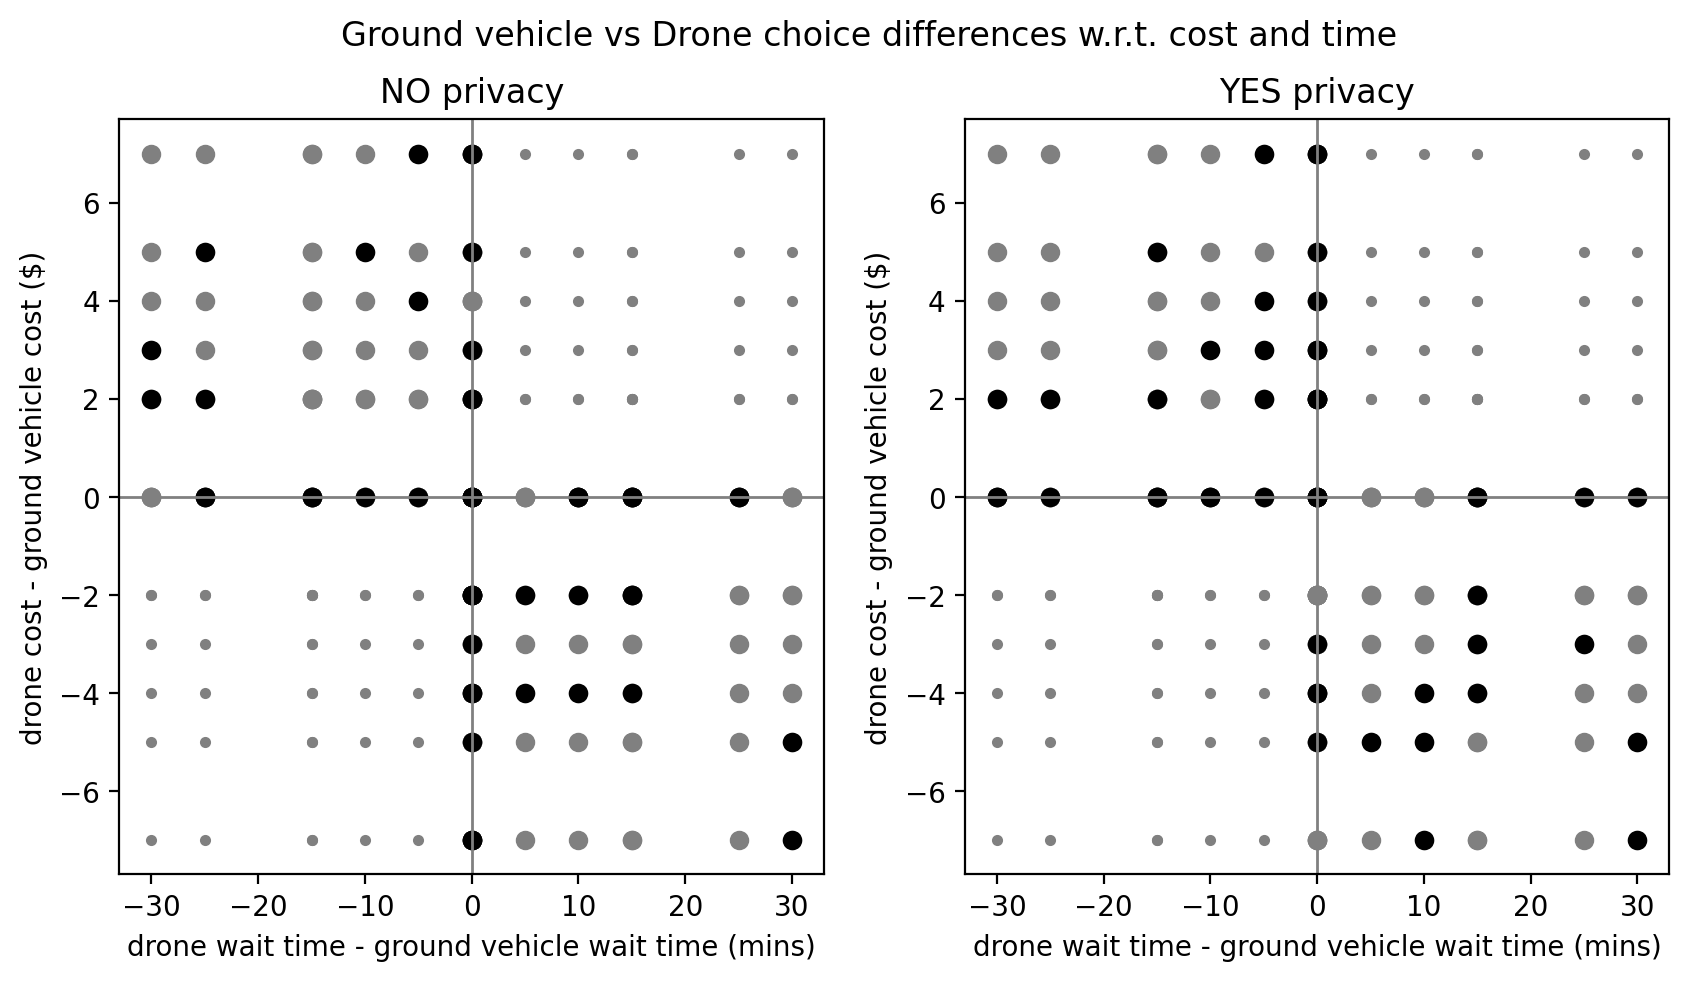

In [84]:
plot_points_tradeoff(df)
print('%s non-excluded choices' % len(df[df['exclude']==False]))
print('%s sampled choices' % QUESTIONS_SAMPLE_SIZE)

In [86]:
vendor_choices_filepath = './choice-sets/v%s-sampled-%s.csv' % (
    v, QUESTIONS_SAMPLE_SIZE
)
print('save to %s' % vendor_choices_filepath)

save to ./choice-sets/v0-sampled-100.csv


In [87]:
columns = ['v','gc','gt','dt','dc','dp']
save_df = df[df['sampled']==True][columns]
print('saving data table to %s...' % vendor_choices_filepath)
save_df.to_csv(vendor_choices_filepath, index=False)
print('...saved')

saving data table to ./choice-sets/v0-sampled-100.csv...
...saved


In [88]:
df = pd.read_csv(vendor_choices_filepath)
df.head()

,v,gc,gt,dt,dc,dp
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,2,0,1
3,0,0,0,0,1,0
4,0,0,1,2,0,0
